# Preprocess and Explore the Data

In [5]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_processing import * 

## Load data

In [6]:
tickers = ["TSLA", "BND", "SPY"]
tsla = load_data('tsla')
bnd = load_data('BND')
spy = load_data('spy')
merged_data = load_data(tickers)
data = merged_data['Close']

2025-03-04 14:19:20,363 - INFO - Loading data from file...


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
2025-03-04 14:19:24,448 - INFO - Data loaded 
2025-03-04 14:19:24,448 - INFO - Loading data from file...
[*********************100%***********************]  1 of 1 completed
2025-03-04 14:19:26,317 - INFO - Data loaded 
2025-03-04 14:19:26,319 - INFO - Loading data from file...
[*********************100%***********************]  1 of 1 completed
2025-03-04 14:19:28,068 - INFO - Data loaded 
2025-03-04 14:19:28,070 - INFO - Loading data from file...
[*********************100%***********************]  3 of 3 completed
2025-03-04 14:19:28,478 - INFO - Data loaded 


## Data cleaning and Understanding

In [7]:
data.head()

Ticker,BND,SPY,TSLA
Date,,,
2015-01-02,62.387077,172.592834,14.620667
2015-01-05,62.568260,169.475891,14.006000
2015-01-06,62.749451,167.879593,14.085333
2015-01-07,62.787132,169.971634,14.063333
2015-01-08,62.689060,172.987762,14.041333


In [8]:
tsla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [9]:
bnd.head()

Price,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND
Date,,,,,
2015-01-02,62.387077,62.417271,62.213463,62.221013,2218800
2015-01-05,62.568260,62.590904,62.424840,62.455034,5820100
2015-01-06,62.749451,62.938159,62.673968,62.673968,3887600
2015-01-07,62.787132,62.862615,62.689006,62.756938,2433400
2015-01-08,62.689060,62.734348,62.628672,62.734348,1873400


In [10]:
spy.head

<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2015-01-02  172.592834  173.811068  171.542642  173.390991  121465900
2015-01-05  169.475891  171.702294  169.165038  171.534266  169632600
2015-01-06  167.879593  170.316035  167.073039  169.786733  209151400
2015-01-07  169.971634  170.316100  168.770219  169.223897  125346700
2015-01-08  172.987762  173.206211  171.383078  171.399871  147217800
...                ...         ...         ...         ...        ...
2025-02-20  610.380005  611.679993  607.020020  611.539978   36554000
2025-02-21  599.940002  610.299988  599.469971  610.159973   76519800
2025-02-24  597.210022  603.030029  596.489990  602.020020   50737200
2025-02-25  594.239990  597.890015  589.559998  597.150024   58266500
2025-02-26  594.539978  599.580017  591.859985  595.929993  

## Summary 

In [11]:
# Check for basic statistics and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2553 entries, 2015-01-02 to 2025-02-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BND     2553 non-null   float64
 1   SPY     2553 non-null   float64
 2   TSLA    2553 non-null   float64
dtypes: float64(3)
memory usage: 79.8 KB


In [12]:
check_missing(data)

Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

In [15]:
data_overview(data)

[04/Mar/2025 14:09:32] INFO - Loading Data Overivew
The shape of our Data is (2553, 3)

Data Overview:


,Data Types,Number of missing values,Unique values
Ticker,,,
BND,float64,0,2321
TSLA,float64,0,2499
SPY,float64,0,2512


In [13]:
data.describe()

Ticker,BND,SPY,TSLA
count,2553.000000,2553.000000,2553.000000
mean,69.105960,318.095269,119.505809
std,4.768626,119.951047,117.775994
min,61.676983,156.800858,9.578000
25%,65.387024,215.134460,17.316668
50%,68.180298,280.418030,34.033333
75%,72.655174,409.043121,223.070007
max,78.588951,612.929993,479.859985


### Normalize data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)


## Exploratory Data Analysis 

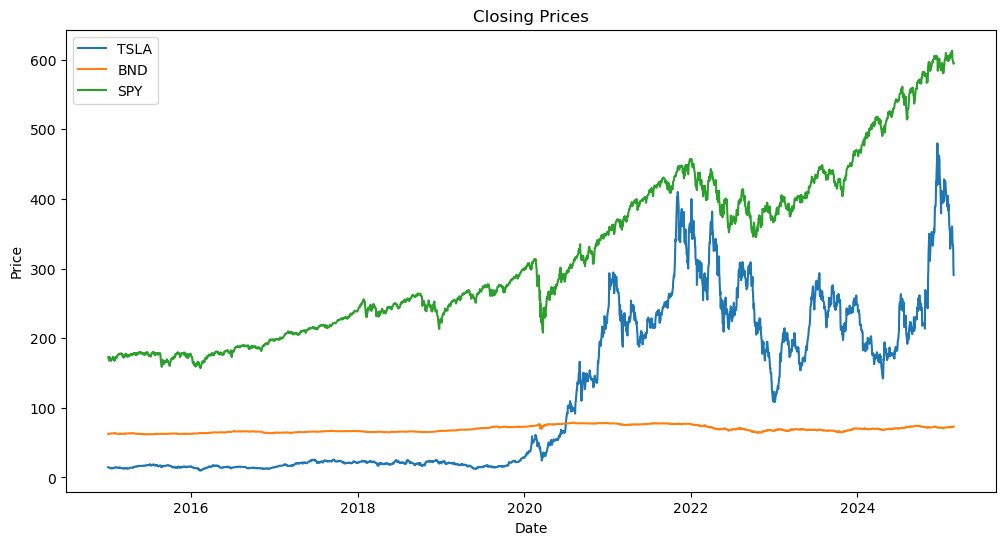

In [15]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title("Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


### Daily percentage change

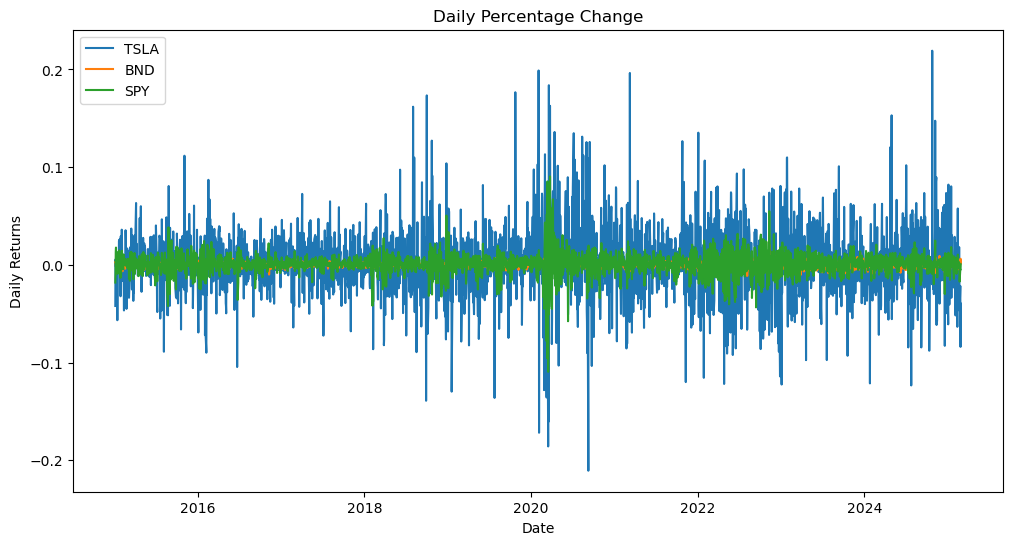

In [16]:
daily_return(data,tickers)

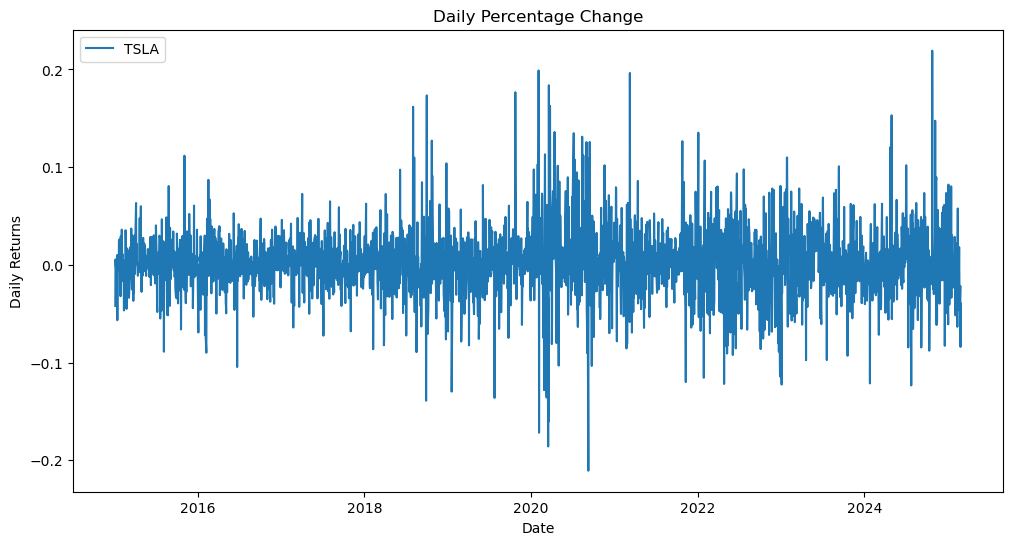

In [17]:
daily_return(data,'TSLA')

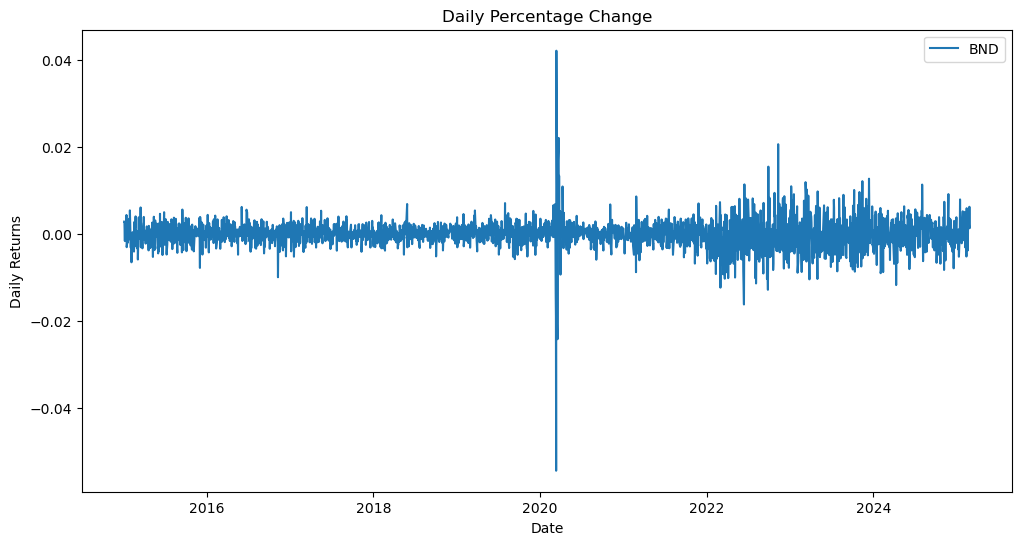

In [20]:
daily_return(data,'BND')

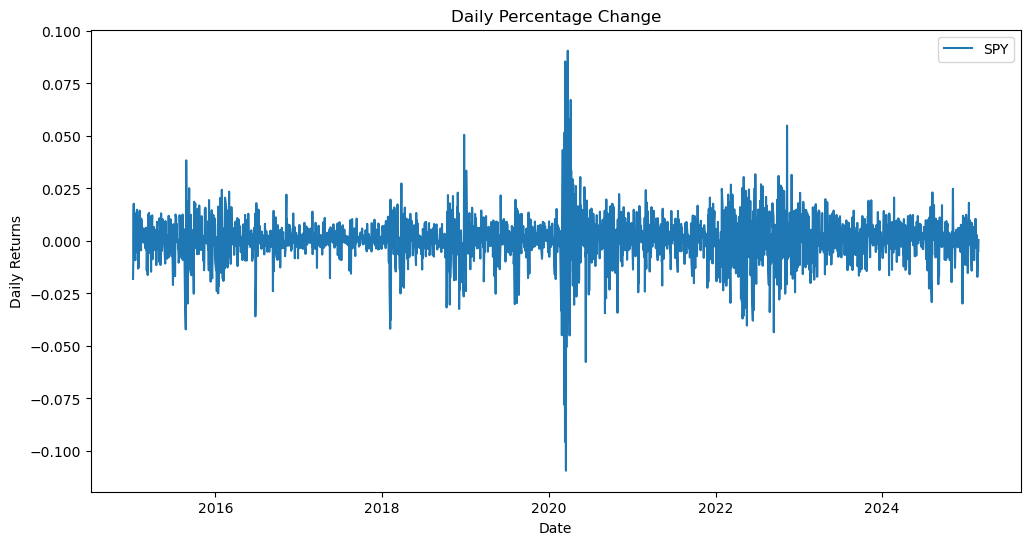

In [18]:
daily_return(data,'SPY')

In [20]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from data_processing import daily_return
daily_returns = data.pct_change().dropna()

In [21]:
daily_returns


Ticker,BND,SPY,TSLA
Date,,,
2015-01-05,0.002904,-0.018060,-0.042041
2015-01-06,0.002896,-0.009419,0.005664
2015-01-07,0.000601,0.012462,-0.001562
2015-01-08,-0.001562,0.017745,-0.001564
2015-01-09,0.001686,-0.008013,-0.018802
...,...,...,...
2025-02-20,0.001244,-0.004160,-0.017085
2025-02-21,0.004417,-0.017104,-0.046840
2025-02-24,0.001374,-0.004550,-0.021522


## Analyze Volatility

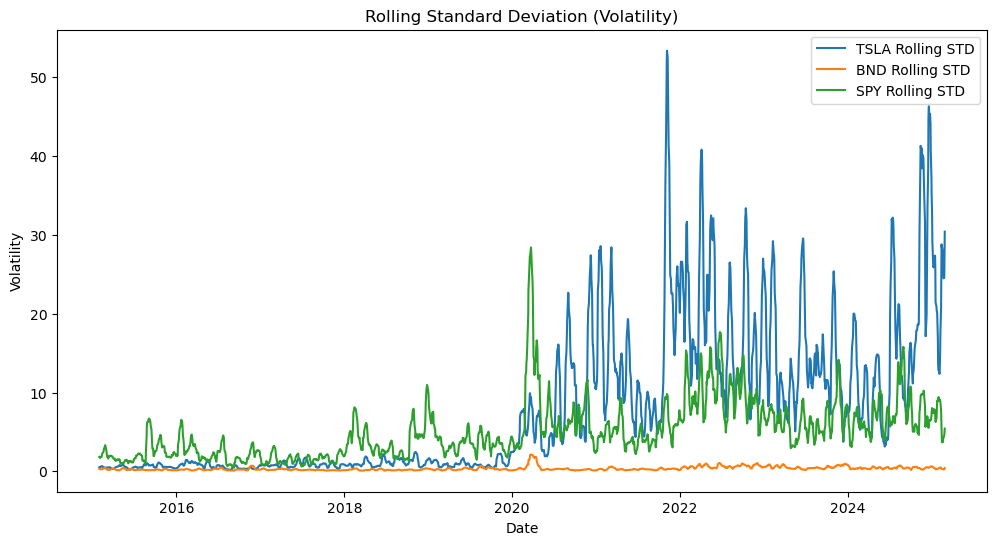

In [22]:
# Define window size (e.g., 20-day rolling window)
window = 20
rolling_mean = data.rolling(window).mean()
rolling_std = data.rolling(window).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rolling_std[ticker], label=f"{ticker} Rolling STD")
plt.title("Rolling Standard Deviation (Volatility)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


### Detecting outliers

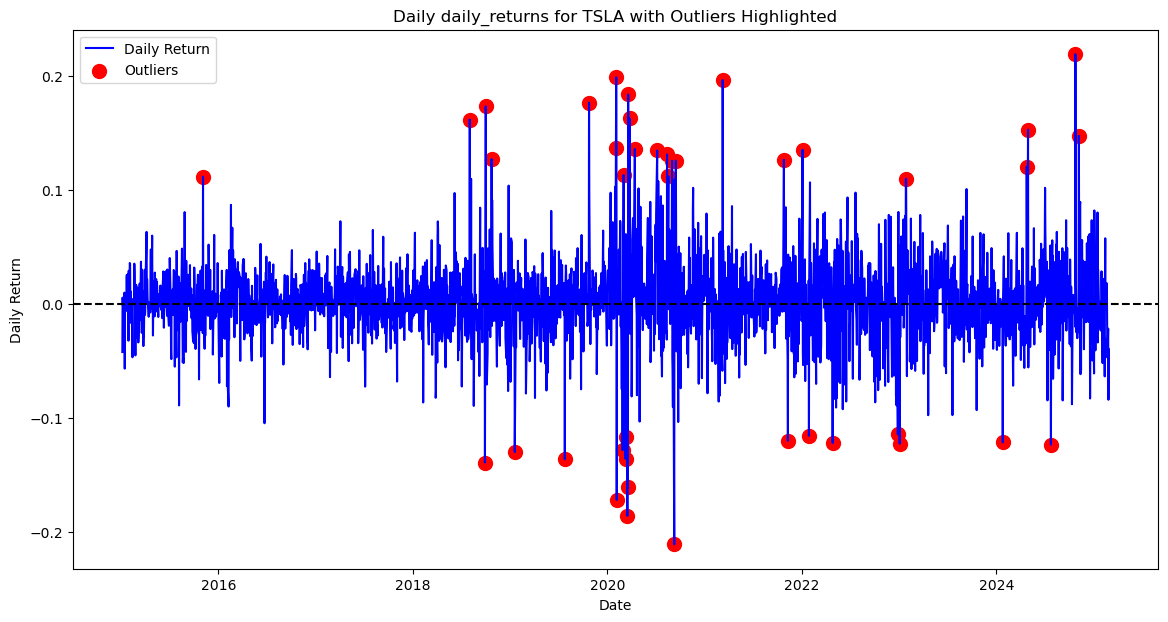


Outlier Days for TSLA:
Ticker          TSLA
Date                
2015-11-04  0.111735
2018-08-02  0.161880
2018-09-28 -0.139015
2018-10-01  0.173471
2018-10-23  0.127189
2019-01-18 -0.129711
2019-07-25 -0.136137
2019-10-24  0.176692
2020-02-03  0.198949
2020-02-04  0.137256
2020-02-05 -0.171758
2020-02-27 -0.128146
2020-03-02  0.113220
2020-03-09 -0.135725
2020-03-12 -0.116172
2020-03-16 -0.185778
2020-03-18 -0.160344
2020-03-19  0.183877
2020-03-24  0.162817
2020-04-13  0.136038
2020-07-06  0.134794
2020-08-12  0.131236
2020-08-17  0.112031
2020-08-31  0.125689
2020-09-08 -0.210628
2020-09-14  0.125832
2021-03-09  0.196412
2021-10-25  0.126616
2021-11-09 -0.119903
2022-01-03  0.135317
2022-01-27 -0.115542
2022-04-26 -0.121841
2022-12-27 -0.114089
2023-01-03 -0.122422
2023-01-27  0.110002
2024-01-25 -0.121253
2024-04-24  0.120611
2024-04-29  0.153069
2024-07-24 -0.123346
2024-10-24  0.219190
2024-11-06  0.147510


In [23]:
detect_outlier(daily_returns,'TSLA')

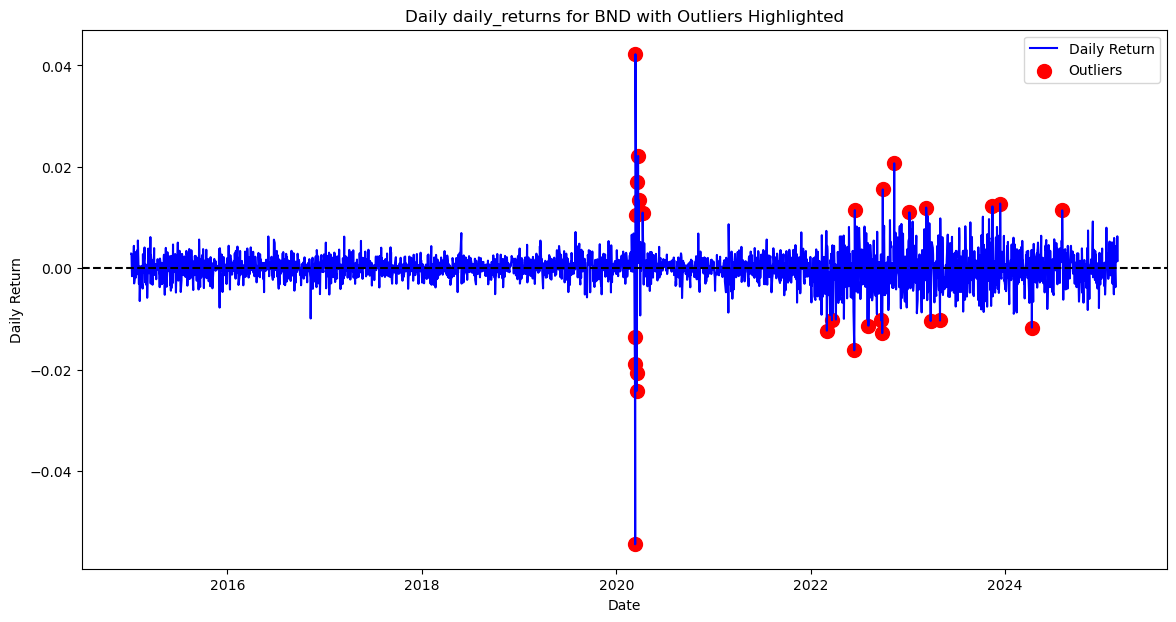


Outlier Days for BND:
Ticker           BND
Date                
2020-03-10 -0.013444
2020-03-11 -0.018940
2020-03-12 -0.054385
2020-03-13  0.042201
2020-03-16  0.010511
2020-03-17 -0.020685
2020-03-18 -0.024140
2020-03-20  0.016956
2020-03-23  0.022149
2020-03-25  0.013439
2020-04-09  0.010980
2022-03-02 -0.012284
2022-03-21 -0.010227
2022-06-13 -0.016153
2022-06-15  0.011460
2022-08-05 -0.011317
2022-09-22 -0.010281
2022-09-26 -0.012777
2022-09-28  0.015544
2022-11-10  0.020702
2023-01-06  0.011027
2023-03-10  0.011976
2023-03-27 -0.010381
2023-05-01 -0.010284
2023-11-14  0.012202
2023-12-13  0.012771
2024-04-10 -0.011686
2024-08-02  0.011418


In [24]:
detect_outlier(daily_returns,'BND')

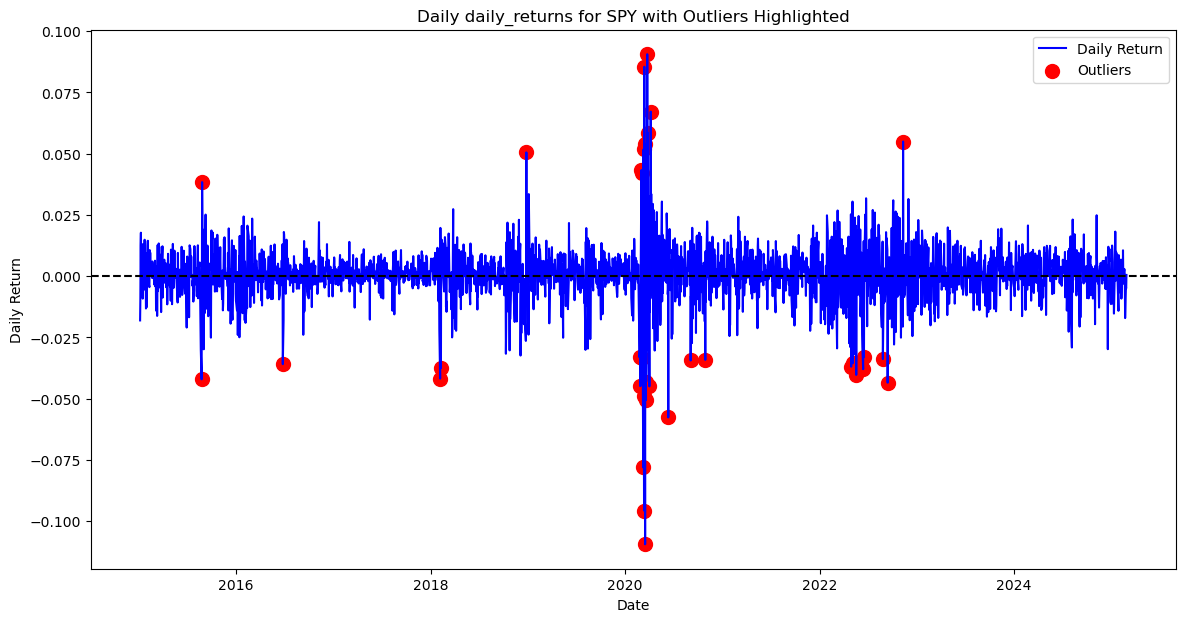


Outlier Days for SPY:
Ticker           SPY
Date                
2015-08-24 -0.042107
2015-08-26  0.038394
2016-06-24 -0.035909
2018-02-05 -0.041823
2018-02-08 -0.037509
2018-12-26  0.050525
2020-02-24 -0.033165
2020-02-27 -0.044912
2020-03-02  0.043307
2020-03-04  0.042033
2020-03-05 -0.033242
2020-03-09 -0.078094
2020-03-10  0.051745
2020-03-11 -0.048749
2020-03-12 -0.095677
2020-03-13  0.085486
2020-03-16 -0.109424
2020-03-17  0.053992
2020-03-18 -0.050633
2020-03-20 -0.043094
2020-03-24  0.090603
2020-03-26  0.058390
2020-04-01 -0.045005
2020-04-06  0.067166
2020-06-11 -0.057649
2020-09-03 -0.034414
2020-10-28 -0.034179
2022-04-29 -0.036956
2022-05-05 -0.035543
2022-05-18 -0.040312
2022-06-13 -0.037968
2022-06-16 -0.033096
2022-08-26 -0.033849
2022-09-13 -0.043482
2022-11-10  0.054954


In [25]:
detect_outlier(daily_returns,'SPY')

## Seasonality and Trends

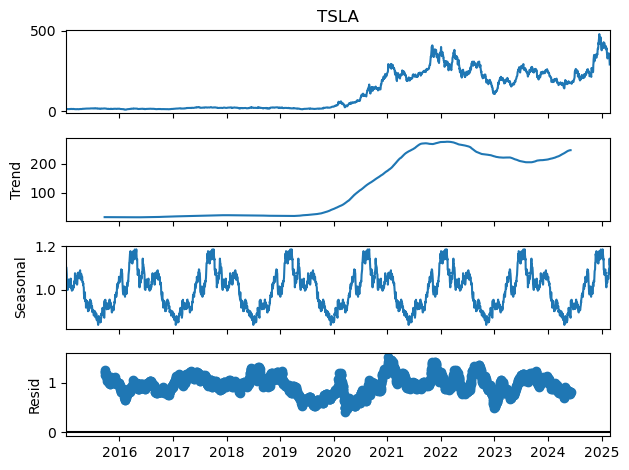

In [26]:
seasonality(data,'TSLA')

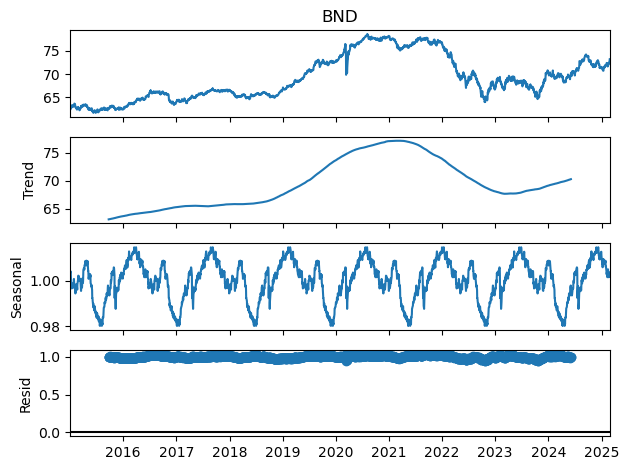

In [27]:
seasonality(data,'BND')

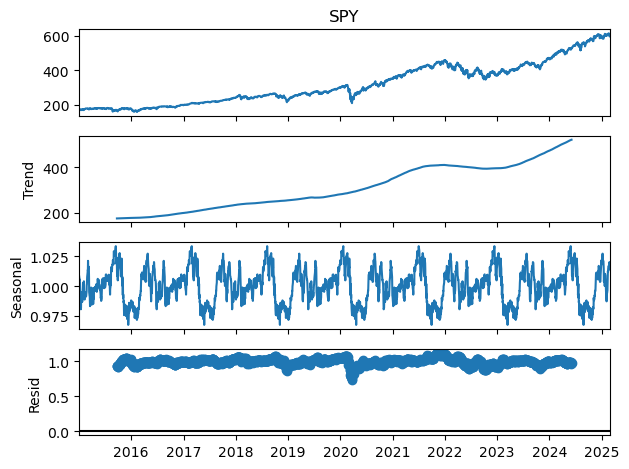

In [28]:
seasonality(data,'SPY')

In [29]:
confidence_level = 0.05  # For 95% confidence
VaR = daily_returns.quantile(confidence_level, axis=0)


In [30]:
VaR

Ticker
BND    -0.004802
SPY    -0.016724
TSLA   -0.051941
Name: 0.05, dtype: float64

In [31]:
risk_free_rate = 0.02  # Assume a risk-free rate of 2%
sharpe_ratios = (daily_returns.mean() - risk_free_rate) / daily_returns.std()


In [32]:
sharpe_ratios

Ticker
BND    -5.817790
SPY    -1.759254
TSLA   -0.504623
dtype: float64